In [1]:
#class imbalance >> when one class has higher percentage
#handle class imbalance problem

#upsampling
#downsampling
#SMOTE

In [2]:
import numpy as np
import pandas as pd

np.random.seed(1) #for reproducibility

no_samples = 1000
class_0_ratio = 0.9
no_class_0 = int(no_samples * class_0_ratio)
no_class_1 = 100

In [3]:
no_class_0, no_class_1

(900, 100)

In [4]:
len(np.random.normal(0, 1, no_class_0))

900

In [5]:
class_0 = {'feature1': np.random.normal(0, 1, no_class_0),
          'feature2': np.random.normal(0, 1, no_class_0),
          'target': [0]*no_class_0}

In [6]:
class_0 = pd.DataFrame(class_0)

In [7]:
class_0

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [8]:
class_1 = pd.DataFrame({'feature1': np.random.normal(3, 1, no_class_1),
          'feature2': np.random.normal(3, 1, no_class_1),
          'target': [1]*no_class_1})

In [9]:
class_1

,feature1,feature2,target
0,2.546497,2.965789,1
1,2.179095,2.718501,1
2,3.940219,3.580178,1
3,1.588707,2.136473,1
4,3.884148,3.326813,1
...,...,...,...
95,1.402786,2.274796,1
96,3.461016,2.861925,1
97,4.316506,3.250043,1
98,3.296370,3.353116,1


In [10]:
df = pd.concat([class_0, class_1]).reset_index(drop = True)

In [11]:
df

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1


In [12]:
df.target.value_counts()

target
0    900
1    100
Name: count, dtype: int64

In [13]:
#upsampling

df_minority = df[df.target == 1]
df_majority = df[df.target == 0]

In [14]:
from sklearn.utils import resample

In [15]:
#replace = True with replacement
df_minority_upsampled = resample(df_minority, replace = True, n_samples = len(df_majority), random_state = 1)

In [16]:
df_minority_upsampled.shape

(900, 3)

In [17]:
df_minority_upsampled.head()

,feature1,feature2,target
937,2.885843,2.430835,1
912,2.736919,2.996908,1
972,3.562542,3.088282,1
909,4.750722,2.409355,1
975,2.448677,4.986539,1


In [18]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
936,5.729462,2.524350,1
998,3.296370,3.353116,1
901,2.179095,2.718501,1
932,1.375641,1.785627,1


In [19]:
df_upsampled.target.value_counts()

target
0    900
1    900
Name: count, dtype: int64

In [20]:
#downsampling
df_minority

,feature1,feature2,target
900,2.546497,2.965789,1
901,2.179095,2.718501,1
902,3.940219,3.580178,1
903,1.588707,2.136473,1
904,3.884148,3.326813,1
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1


In [21]:
df_majority

,feature1,feature2,target
0,-0.446699,-1.307971,0
1,0.204377,1.472396,0
2,0.612233,0.074876,0
3,0.744885,-1.786935,0
4,-0.036281,0.165211,0
...,...,...,...
895,0.833679,-1.322762,0
896,2.160456,0.540306,0
897,1.998992,-0.507257,0
898,0.764041,1.128379,0


In [22]:
df_majority_downsampled = resample(df_majority, replace = False, n_samples = len(df_minority), random_state = 1)

In [23]:
df_downsampled = pd.concat([df_minority, df_majority_downsampled])

In [24]:
df_downsampled

,feature1,feature2,target
900,2.546497,2.965789,1
901,2.179095,2.718501,1
902,3.940219,3.580178,1
903,1.588707,2.136473,1
904,3.884148,3.326813,1
...,...,...,...
494,2.711950,1.152007,0
255,0.522655,-0.241664,0
672,0.683356,-0.999110,0
481,-0.800787,-0.080607,0


In [25]:
df_downsampled.target.value_counts()

target
1    100
0    100
Name: count, dtype: int64

In [26]:
##SMOTE>> Synthetic Minority oversampling technique

In [27]:
from sklearn.datasets import make_classification

In [28]:
X, y = make_classification(n_samples = 1000, n_redundant=0, n_features = 2, n_clusters_per_class=1, weights = [0.90], random_state=1)

In [29]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [30]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [31]:
len(y[y==0])

894

In [32]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
final_df = pd.concat([df1, df2], axis=1)
final_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


In [33]:
final_df.target.value_counts()

target
0    894
1    106
Name: count, dtype: int64

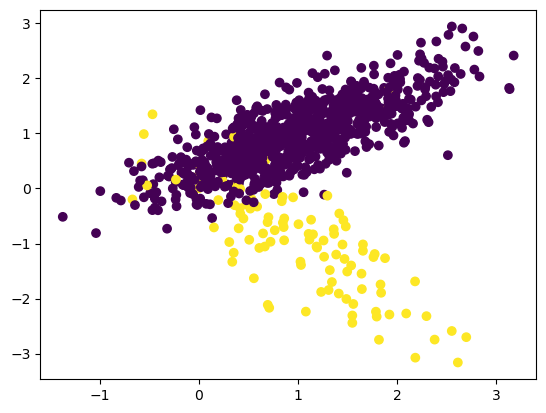

In [34]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'], final_df['f2'], c = final_df['target'])

In [35]:
#!pip install imblearn

In [36]:
from imblearn.over_sampling import SMOTE

In [37]:
oversample = SMOTE()

In [39]:
X, y = oversample.fit_resample(final_df[['f1', 'f2']], final_df['target'])

In [40]:
X.shape

(1788, 2)

In [41]:
y.shape

(1788,)

In [42]:
len(y[y==0])

894

In [43]:
len(y[y==1])

894

In [44]:
df1 = pd.DataFrame(X, columns = ['f1', 'f2'])
df2 = pd.DataFrame(y, columns = ['target'])
oversample_df = pd.concat([df1, df2], axis=1)
oversample_df

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
1783,0.412443,-0.461477,1
1784,1.480492,-0.682876,1
1785,1.101318,-0.587191,1
1786,1.202037,-1.055703,1


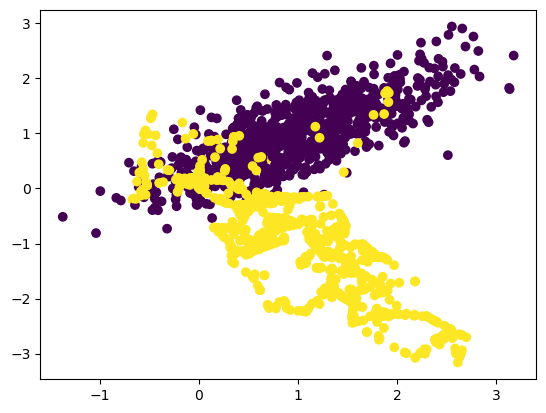

In [45]:
plt.scatter(oversample_df['f1'], oversample_df['f2'], c = oversample_df['target'])

In [48]:
oversample_df[oversample_df.target == 1]

,f1,f2,target
0,1.536830,-1.398694,1
8,2.552644,-2.588927,1
14,1.115618,-0.929017,1
17,1.558391,-2.098504,1
20,-0.672512,-0.198716,1
...,...,...,...
1783,0.412443,-0.461477,1
1784,1.480492,-0.682876,1
1785,1.101318,-0.587191,1
1786,1.202037,-1.055703,1


In [49]:
df_minority

,feature1,feature2,target
900,2.546497,2.965789,1
901,2.179095,2.718501,1
902,3.940219,3.580178,1
903,1.588707,2.136473,1
904,3.884148,3.326813,1
...,...,...,...
995,1.402786,2.274796,1
996,3.461016,2.861925,1
997,4.316506,3.250043,1
998,3.296370,3.353116,1
